## Spatial data visualization with `tidycensus`

**Location! Location! Location!**  

The location people live in tells us a lot about the space itself as well as the people who live in there. This demo is about spatial data visualization with `tidycensus` R package with two variables of interest -- population and race distribution. First we will get the big picture at the Virginia state scale, then will zoom in on northern Virginia in Washington DC metro area.


### Tools
We do not have to start from scratch. As always the case, someone has already done the hard work for us so we can stand on their shoulders.  

[Kyle Walker](https://walkerke.github.io/) in this case has developed an `rstat` package called [`tidycensus`](https://github.com/walkerke/tidycensus). This package allows for easy access, analysis and visualization of Census Beureau data on hundreds of variables.  

Not that in Python you can not do spatial analysis/visualization of census data, but certainly not as easily as in R because of some excellent rstats packages available and tailored for this purpose.  

To be able to use `tidycensus` you'll need your own Census API Key. If you do not have one, [get one](https://www.census.gov/developers/).  

The only other library you'll need is `tidyverse`; and this is it! If you like interactive visialization of maps (i.e. zoom in zoom out etc.) you will need additional libraries and codes. 

---
Okay, so here we go ... 

In [56]:
# import libraries
library(tidycensus)
library(tidyverse)
options(tigris_use_cache = TRUE)

# get your Census Bureau API key
census_api_key("xxxx")

To install your API key for use in future sessions, run this function with `install = TRUE`.


Getting data from the 2012-2016 5-year ACS


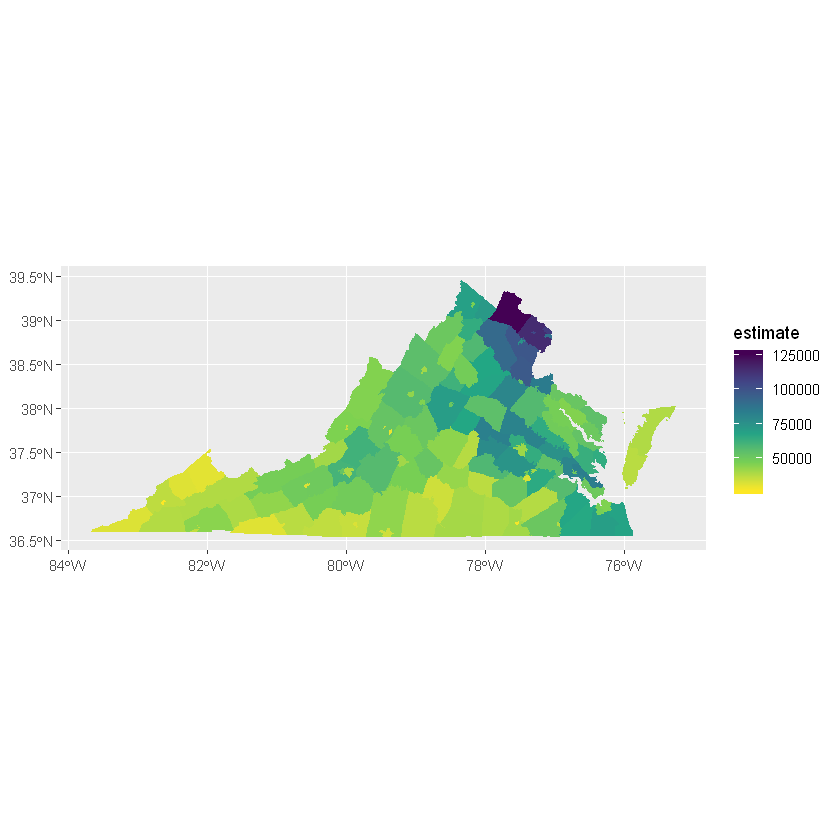

In [76]:
# geting VA population data of counties
vapop <- get_acs(state = "VA", geography = "county", 
                  variables = "B19013_001", geometry = TRUE)
# plot VA population
vapop %>%
  ggplot(aes(fill = estimate)) + 
  geom_sf(color = NA) + 
  coord_sf(crs = "+init=epsg:4326") + # original 26911 
  scale_fill_viridis_c(option = "viridis", direction=-1) #  original: scale_fill_viridis_c(option = "magma") 

Getting data from the 2010 decennial Census


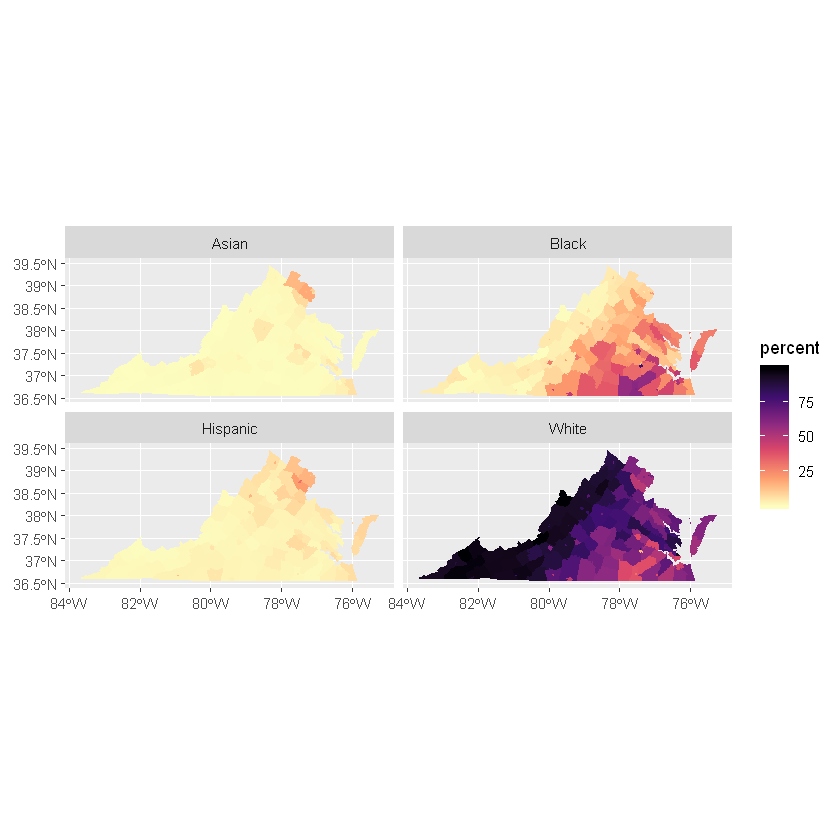

In [67]:
# specify races
races <- c(White = "P005003", 
              Black = "P005004", 
              Asian = "P005006", 
              Hispanic = "P004003")

# get decennial data on races
varace <- get_decennial(geography = "county", variables = races, 
                  state = "VA", geometry = TRUE,
                  summary_var = "P001001") 

# plot race variables as a percent of total population
varace %>%
  mutate(percent = 100 * (value / summary_value)) %>% # create a calculated column of percent value
  ggplot(aes(fill = percent)) +
  facet_wrap(~variable) +
  geom_sf(color = NA) +
  coord_sf(crs = "+init=epsg:4326") + 
  scale_fill_viridis_c(option = "magma", direction=-1)


## Zooming in on Northern Virginia

Getting data from the 2012-2016 5-year ACS


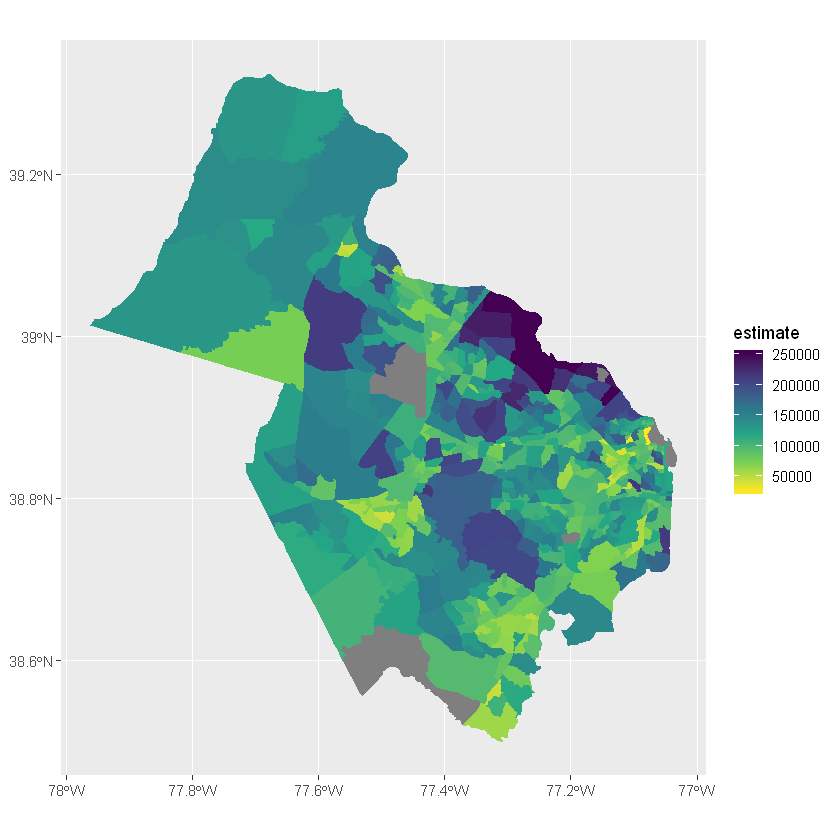

In [73]:
# specify counties that constitute Northern Virginia
NOVA = c("Fairfax County", "Fairfax City", "Manassas Park City", "Arlington County", "Loudoun County", "Alexandria City", "Falls Church City", "Prince William County", "Manassas City")

# get population data of NOVA cunties
novapop <- get_acs(state = "VA", county = NOVA, geography = "tract", 
                  variables = "B19013_001", geometry = TRUE)

# plot NOVA population

novapop %>%
  ggplot(aes(fill = estimate)) + 
  geom_sf(color = NA) + 
  coord_sf(crs = "+init=epsg:4326") + 
  scale_fill_viridis_c(option = "viridis", direction=-1) #  original: scale_fill_viridis_c(option = "magma") 

Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census
Getting data from the 2010 decennial Census


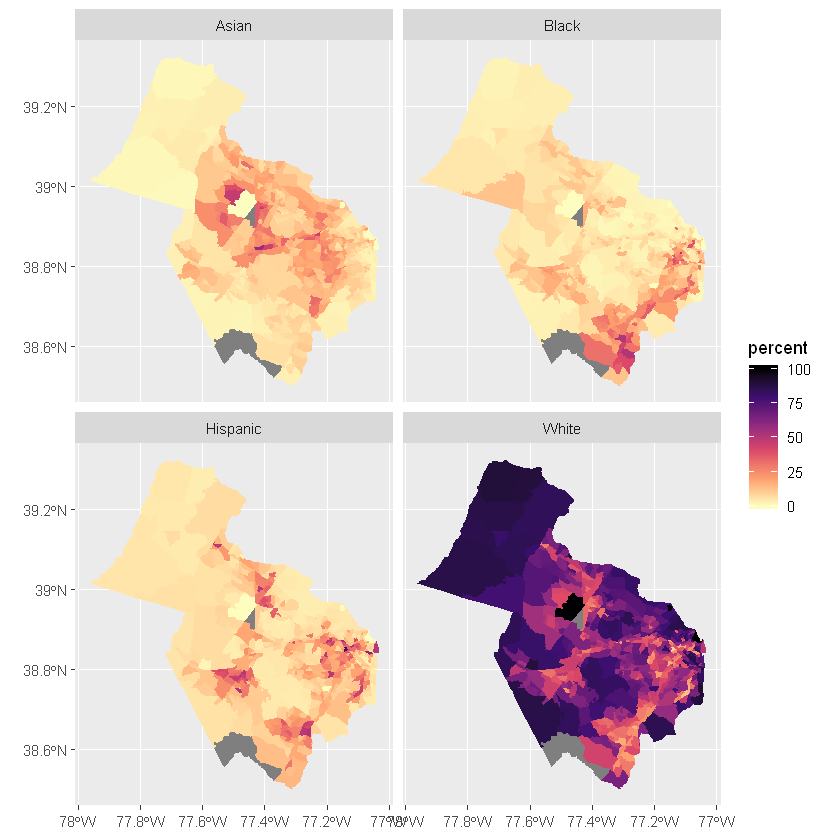

In [69]:
# get decennial data on races
novarace <- get_decennial(geography = "tract", variables = races, 
                  state = "VA", county = NOVA, geometry = TRUE,
                  summary_var = "P001001") 

# plot race variables as a percent of total population
novarace %>%
  mutate(percent = 100 * (value / summary_value)) %>% # create a calculated column of percent value
  ggplot(aes(fill = percent)) +
  facet_wrap(~variable) +
  geom_sf(color = NA) +
  coord_sf(crs = "+init=epsg:4326") + 
  scale_fill_viridis_c(option = "magma", direction=-1)